In [54]:
# Data Processing
import pandas as pd
import numpy as np

# Stats & Machine Learning
import scipy.stats as stats
import sklearn as skl

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Mute Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\cg\Desktop\dota2heroes.csv')

In [8]:
df = df[['TotalStrength', 'TotalAgility', 'TotalIntelligence', 'Category']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TotalStrength      120 non-null    float64
 1   TotalAgility       120 non-null    float64
 2   TotalIntelligence  120 non-null    float64
 3   Category           120 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.9+ KB


In [12]:
df.describe()

,TotalStrength,TotalAgility,TotalIntelligence
count,120.000000,120.000000,120.000000
mean,24.002500,20.210833,22.215833
std,3.368601,5.128824,4.582135
min,16.200000,0.000000,13.800000
25%,21.350000,16.775000,18.525000
50%,23.750000,20.050000,21.800000
75%,26.425000,24.325000,25.550000
max,32.100000,36.800000,34.200000


<Axes: xlabel='Category', ylabel='TotalStrength'>

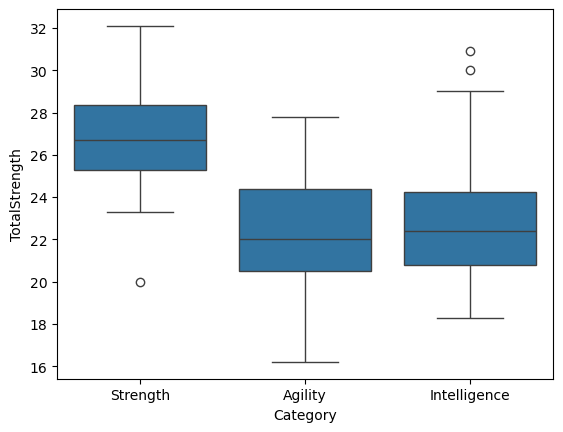

In [107]:
sns.boxplot(data=df, x="Category", y="TotalStrength")

# ANALYSIS OF VARIANCE (ANOVA)

In [108]:
from scipy import stats

ANOVA uses Categorical variables to try and predict continuous ones.

Null Hypothesis - The mean Strength of all categories are equal.

Alternative Hypothesis - The mean Strength of at least one category is different.

Significance Level - .05

In [164]:
# Calculate Mean Strength of All Categories
allmean = round(df['TotalStrength'].mean(), 2)
print(allmean)

24.0


In [162]:
def calc_category_mean(list):
    for i in list:
        print(f'Mean Strength for {i} Category: {round(df[df['Category'] == i]['TotalStrength'].mean(), 2)}')
        print(f'Standard Deviation of Strength for {i} Category: {round(df[df['Category'] == i]['TotalStrength'].std(), 2)}')
        if round(df[df['Category'] == i]['TotalStrength'].mean()) > allmean:
            print(f'{round(df[df['Category'] == i]['TotalStrength'].mean(), 2)} is higher than the {allmean} mean of all categories.\n')
        else:
            print(f'{round(df[df['Category'] == i]['TotalStrength'].mean(), 2)} is lower than the {allmean} mean of all categories.\n')

categories = ['Strength', 'Agility', 'Intelligence']

calc_category_mean(categories)

Mean Strength for Strength Category: 26.93
Standard Deviation of Strength for Strength Category: 2.43
26.93 is higher than the 24.0 mean of all categories.

Mean Strength for Agility Category: 22.22
Standard Deviation of Strength for Agility Category: 2.75
22.22 is lower than the 24.0 mean of all categories.

Mean Strength for Intelligence Category: 22.93
Standard Deviation of Strength for Intelligence Category: 2.85
22.93 is lower than the 24.0 mean of all categories.



In [163]:
# Create categories
c1 = df[df['Category'] == 'Strength']['TotalStrength'].tolist()
c2 = df[df['Category'] == 'Agility']['TotalStrength'].tolist()
c3 = df[df['Category'] == 'Intelligence']['TotalStrength'].tolist()

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(c1, c2, c3)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 34.90856513952278
P-value: 1.2912078696995511e-12


**F-Statistic** - The ratio of two variances.
- Variance Between Groups - Measures how much the group means deviate from the overall mean.
- Variance Within Groups - Measures the variability within each group.

A higher F-Statistic indicates a larger difference between group means relative to the variability within the groups; this suggests at least one group mean is significantly different from the others. A lower F-Statistic suggets group means are similar to each other, meaning there is little no significant difference between groups.

**P-Value**

A low P-Value (typically <.05) indicates the observed F-Statistic is unlikely to have occured by chance if all group means were equal. Otherwise (if the P Value is >= .05), there is no statistically significant difference between group means.

Our P Value is < .05, which confirms the differences in means between categories are unlikely due to random chance, but rather as an effect of the category.

**Hypothesis Result**